In [ ]:
5#below will unzip and load dataset folder

!unzip /content/aclImdb.zip

Streaming output truncated to the last 5000 lines.
  inflating: aclImdb/train/pos/9260_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._9260_7.txt  
  inflating: aclImdb/train/pos/1599_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._1599_7.txt  
  inflating: aclImdb/train/pos/2174_8.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2174_8.txt  
  inflating: aclImdb/train/pos/2309_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2309_9.txt  
  inflating: aclImdb/train/pos/12034_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._12034_10.txt  
  inflating: aclImdb/train/pos/11703_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._11703_9.txt  
  inflating: aclImdb/train/pos/5619_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._5619_9.txt  
  inflating: aclImdb/train/pos/2928_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2928_10.txt  
  inflating: aclImdb/train/pos/7096_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7096_10.txt  
  inflating: aclImdb/train/pos/793_9.txt  
  inf

In [ ]:
import os
import pandas as pd

# loading the data in a pandas dataframe format with each text review in a row
def load_data(base_dir):
    data = []
    labels = []
    for dataset_type in ['train', 'test']:
        for sentiment in ['pos', 'neg']:
            dir_name = os.path.join(base_dir, dataset_type, sentiment)
            for fname in sorted(os.listdir(dir_name)):
              # checking if the file name ends with .txt
                if fname.endswith('.txt'):
                    with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                        data.append(f.read())
                    #assigning label = 1 if the sentiment is pos and label = 0 if the sentiment is neg
                    label = 1 if sentiment == 'pos' else 0
                    labels.append(label)
    # dataframe consists of review and sentiment coloumns
    return pd.DataFrame({
        'review': data,
        'sentiment': labels
    })

base_dir = '/content/aclImdb'
data_df = load_data(base_dir)

#shows first 5 rows of loaded database
data_df.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [ ]:
# Checking for missing values
missing_values = data_df.isnull().sum()
print(missing_values)

review       0
sentiment    0
dtype: int64


In [ ]:
#below is used to do the tokenization and text normalization
import nltk
import string
from nltk.corpus import stopwords

# Downloading the NLTK stop words
nltk.download('stopwords')
nltk.download('punkt')

def tokenize_and_normalize(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Text Normalization
    # Converting text to lowercase
    tokens = [word.lower() for word in tokens]

    # Removing punctuation and numbers
    tokens = [word for word in tokens if word.isalpha()]

    return tokens

# Applying the function to the 'review' column of the DataFrame
data_df['tokens'] = data_df['review'].apply(tokenize_and_normalize)

data_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,review,sentiment,tokens
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, is, a, cartoon, comedy, it, r..."
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, or, houselessness, as, george, ..."
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, by, lesley, ann, warren, best, dra..."
3,This is easily the most underrated film inn th...,1,"[this, is, easily, the, most, underrated, film..."
4,This is not the typical Mel Brooks film. It wa...,1,"[this, is, not, the, typical, mel, brooks, fil..."


In [ ]:
#below is used to remove the stopwords
from nltk.corpus import stopwords

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Applying the function to the 'tokens' column of the DataFrame
data_df['tokens'] = data_df['tokens'].apply(remove_stopwords)

data_df.head()

,review,sentiment,tokens
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p..."
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ..."
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati..."
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brooks, cannon..."
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brooks, film, much, less, slaps..."


In [ ]:
#below is used to lemmatize the text

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

# Applying the function to the 'tokens' column of the DataFrame
data_df['tokens'] = data_df['tokens'].apply(lemmatize)

data_df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...


,review,sentiment,tokens
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p..."
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ..."
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati..."
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,..."
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic..."


In [ ]:
#below is used to handle the negations of the movie reviews

import re

def handle_negation(tokens):
    negation = False
    handled_tokens = []
    #list of negative terms we will use for this phase
    negation_terms = ["not", "no", "never", "neither", "nor", "none",
    "nobody", "nothing", "nowhere", "hardly", "scarcely",
    "barely", "doesn’t", "isn’t", "wasn’t", "shouldn’t",
    "wouldn’t", "couldn’t", "won’t", "can’t", "don’t"]
    for token in tokens:
        # If negation is detected, the flag stays True for the next word
        if negation:
            handled_tokens.append(f'not_{token}')
            negation = False  # Reset the flag after handling negation
        elif token in negation_terms:
            negation = True  # Set the flag if a negation term is detected
        else:
            handled_tokens.append(token)
    return handled_tokens

# Applying the function to the 'tokens' column of the DataFrame
data_df['tokens'] = data_df['tokens'].apply(handle_negation)

random_sample = data_df.sample(n=5)


for index, row in random_sample.iterrows():
    print(f"Review: {row['review']}")
    print(f"Sentiment: {row['sentiment']}")
    print(f"Tokens: {row['tokens']}")
    print('-'*80)

Review: Like many other people, I've heard about "more" and I wanted to watch it due to the music that was composed by Pink Floyd. I must say that I was truly disappointed, not because of the music but the movie in itself. it's a boring insipid movie that lacks rhythm. Where does this disappointment come from? According to me, from different things. First of all, the movie's subject, the drug links up badly with the idle sunny atmosphere of the movie. This one should have taken place in the sordid areas of Paris and should have gave birth to a dark and helpless climate,for example. Moreover, it's supposed to tell a descent into hell but this descent is softened and barely sketched out. Barbet Schroeder doesn't insist enough on the dramatic side of the story. You could have wished a little more of madness, cutting. On another hand, Schroeder doesn't succeed in gaining the audience's emotion and adherence in front of the two main characters' distress. You watch carelessly their trials wi

In [ ]:
#below is used for the phase of building the vocabulary

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

# Combine all tokens into a single list
all_tokens = [token for sublist in data_df['tokens'].tolist() for token in sublist]

# Create a tokenizer object
tokenizer = Tokenizer()

# Build the vocabulary
tokenizer.fit_on_texts(all_tokens)

# Convert tokens to integers
data_df['tokens_int'] = data_df['tokens'].apply(lambda x: tokenizer.texts_to_sequences([x])[0])

data_df.head()

,review,sentiment,tokens,tokens_int
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ..."
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,..."
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ..."
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5..."
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,..."


In [ ]:
#below is used for completing the padding phase

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_sequence_length = max(data_df['tokens_int'].apply(len))

# Pad sequences
padded_sequences = pad_sequences(data_df['tokens_int'], maxlen=max_sequence_length, padding='post')

#store the padded sequences back in your DataFrame:
data_df['padded_sequences'] = list(padded_sequences)

data_df.head()

for idx, sequence in enumerate(data_df['padded_sequences'].iloc[:5]):
    print(f"Row {idx}, Sequence Length: {len(sequence)}, Expected Length: {max_sequence_length}")

Row 0, Sequence Length: 1417, Expected Length: 1417
Row 1, Sequence Length: 1417, Expected Length: 1417
Row 2, Sequence Length: 1417, Expected Length: 1417
Row 3, Sequence Length: 1417, Expected Length: 1417
Row 4, Sequence Length: 1417, Expected Length: 1417


In [ ]:
#downloading the GloVe pre trained word embeddings

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

import numpy as np

def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_file_path = 'glove.6B.100d.txt'
glove_embeddings = load_glove_embeddings(glove_file_path)

def create_embedding_matrix(tokenizer, embeddings_index, embedding_dim):
    vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index for padding
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for word, i in tokenizer.word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in the embedding index will be all-zeros in the embedding matrix
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

embedding_dim = 100
embedding_matrix = create_embedding_matrix(tokenizer, glove_embeddings, embedding_dim)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_sequence_length,
                    trainable=False))  # Set trainable to False to keep the embeddings fixed

# List of words to display embeddings for
words_to_display = ['movie', 'actor', 'good', 'bad']

# Fetch and print the embeddings
for word in words_to_display:
    word_index = tokenizer.word_index.get(word, None)
    if word_index is not None:
        embedding_vector = embedding_matrix[word_index]
        print(f"Embedding for word '{word}': {embedding_vector}")
    else:
        print(f"No embedding found for word '{word}'")

--2023-11-04 18:10:12--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-04 18:10:13--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-04 18:10:14--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
#below is used to create a validation set from the existing training set:

from sklearn.model_selection import train_test_split

# Assuming padded_sequences is your training data and data_df['sentiment'] are your labels
X_train_padded, X_val_padded, y_train, y_val = train_test_split(
    padded_sequences, data_df['sentiment'], test_size=0.2, random_state=42, stratify=data_df['sentiment']
)
print(f'Training data dimensions: {X_train_padded.shape}, {y_train.shape}')
print(f'Validation data dimensions: {X_val_padded.shape}, {y_val.shape}')

Training data dimensions: (40000, 1417), (40000,)
Validation data dimensions: (10000, 1417), (10000,)


In [ ]:
# below will check for overlap in indices between training and validation sets
overlap = set(y_train.index) & set(y_val.index)
print(f'Number of overlapping indices: {len(overlap)}')

print(f'Training data samples:\n{X_train_padded[:5]}')
print(f'Validation data samples:\n{X_val_padded[:5]}')

#below will display the stats summary for the traingig and validation set:

print(f'Training data summary stats:\n{y_train.describe()}')
print(f'Validation data summary stats:\n{y_val.describe()}')

Number of overlapping indices: 0
Training data samples:
[[ 112    2  769 ...    0    0    0]
 [ 396   19  110 ...    0    0    0]
 [4981  169  169 ...    0    0    0]
 [  35   63  294 ...    0    0    0]
 [1872  161   21 ...    0    0    0]]
Validation data samples:
[[ 1172  1172   238 ...     0     0     0]
 [ 8199   636  1024 ...     0     0     0]
 [ 4043 11872  9423 ...     0     0     0]
 [  924    28    30 ...     0     0     0]
 [ 1957    27   664 ...     0     0     0]]
Training data summary stats:
count    40000.000000
mean         0.500000
std          0.500006
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: sentiment, dtype: float64
Validation data summary stats:
count    10000.000000
mean         0.500000
std          0.500025
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: sentiment, dtype: float64


In [ ]:
#below is used to create the compound score

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Instantiate the sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

data_df['sentiment_scores'] = data_df['review'].apply(lambda x: sia.polarity_scores(x))

# below will extract the compound score as a feature
data_df['compound_score'] = data_df['sentiment_scores'].apply(lambda x: x['compound'])

# Displaing some sample compound scores
print(data_df[['review', 'compound_score']].sample(5))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                  review  compound_score
7978   Although written by Stephen King, an overrated...          0.9086
37360  This was a really interesting Halloween film. ...         -0.8580
32463  I have not seen it since 1998 and yet I STILL ...          0.9422
30660  When "Madame" decides to let her cats inherit ...          0.9845
46749  I saw this movie, and I do like horror movies....          0.9506


In [ ]:
#batching and shuffling:

import tensorflow as tf

BATCH_SIZE = 32

# Creating datasets
train_dataset = (tf.data.Dataset.from_tensor_slices((X_train_padded, y_train))
                 .shuffle(buffer_size=len(X_train_padded))  # Shuffle
                 .batch(BATCH_SIZE)  # Batch
                 .prefetch(tf.data.experimental.AUTOTUNE))  # Prefetch

val_dataset = (tf.data.Dataset.from_tensor_slices((X_val_padded, y_val))
               .batch(BATCH_SIZE)  # Batch
               .prefetch(tf.data.experimental.AUTOTUNE))  # Prefetch

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Defining model hyperparameters
embedding_dim = 100  # Assuming GloVe embeddings with 100 dimensions
lstm_units = 64  # Number of LSTM units
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size
sequence_length = max_sequence_length

# Define batch size and epochs
batch_size = 32
epochs = 5

# Creating the RNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length))
model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Bidirectional(LSTM(lstm_units)))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Displaying model summary
model.summary()

# Creating callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True)

history = model.fit(train_dataset, epochs=epochs, validation_data=val_dataset,
                    callbacks=[early_stopping, model_checkpoint])

# Evaluating the model
test_loss, test_accuracy = model.evaluate(val_dataset)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1417, 100)         8751100   
                                                                 
 bidirectional (Bidirection  (None, 1417, 128)         84480     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 1417, 128)         0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                

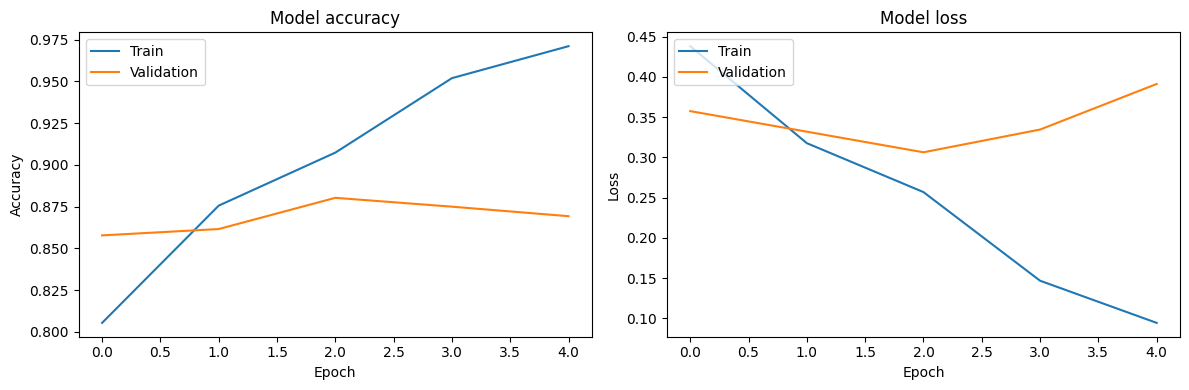

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values for RNN
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
loss, accuracy = model.evaluate(X_val_padded, y_val)
print(f"Validation Accuracy: {accuracy*100:.2f}%")
predictions = model.predict(X_val_padded)
binary_predictions = (predictions > 0.5).astype(int)
precision = precision_score(y_val, binary_predictions)
recall = recall_score(y_val, binary_predictions)
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")

313/313 [==============================] - 25s 67ms/step - loss: 0.3912 - accuracy: 0.8693
Validation Accuracy: 86.93%
313/313 [==============================] - 22s 65ms/step
Validation Precision: 0.8392
Validation Recall: 0.9136


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have a model and X_train_padded, y_train for training data
predictions_train = model.predict(X_train_padded)
binary_predictions_train = (predictions_train > 0.5).astype(int)
training_accuracy = accuracy_score(y_train, binary_predictions_train)

print(f"Training Accuracy: {training_accuracy * 100:.2f}%")


1250/1250 [==============================] - 85s 68ms/step
Training Accuracy: 98.28%


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Assuming you have a model, X_train_padded, and y_train for training data
predictions_train = model.predict(X_train_padded)
binary_predictions_train = (predictions_train > 0.5).astype(int)

precision_train = precision_score(y_train, binary_predictions_train)
recall_train = recall_score(y_train, binary_predictions_train)

print(f"Training Precision: {precision_train:.4f}")
print(f"Training Recall: {recall_train:.4f}")

1250/1250 [==============================] - 96s 77ms/step
Training Precision: 0.9737
Training Recall: 0.9924


In [ ]:
#loading test data
import os

def load_data(directory):
    reviews = []
    sentiments = []

    for sentiment in ['pos', 'neg']:
        dir_name = os.path.join(directory, sentiment)
        for fname in os.listdir(dir_name):
            if fname.endswith('.txt'):
                with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                    reviews.append(f.read())
                if sentiment == 'pos':
                    sentiments.append(1)
                else:
                    sentiments.append(0)

    return pd.DataFrame({'review': reviews, 'sentiment': sentiments})

# Adjust the path according to your dataset's structure
test_data = load_data('aclImdb/test')

data_df.head()

,review,sentiment,tokens,tokens_int,padded_sequences,sentiment_scores,compound_score
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","{'neg': 0.044, 'neu': 0.916, 'pos': 0.039, 'co...",-0.1759
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","{'neg': 0.111, 'neu': 0.739, 'pos': 0.151, 'co...",0.9688
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","{'neg': 0.078, 'neu': 0.736, 'pos': 0.186, 'co...",0.9657
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","{'neg': 0.02, 'neu': 0.759, 'pos': 0.221, 'com...",0.9825
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","{'neg': 0.012, 'neu': 0.809, 'pos': 0.179, 'co...",0.9731


In [ ]:
#tokenizing test data
test_data['tokens'] = test_data['review'].apply(tokenize_and_normalize)
data_df.head()

,review,sentiment,tokens,tokens_int,padded_sequences,sentiment_scores,compound_score
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","{'neg': 0.044, 'neu': 0.916, 'pos': 0.039, 'co...",-0.1759
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","{'neg': 0.111, 'neu': 0.739, 'pos': 0.151, 'co...",0.9688
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","{'neg': 0.078, 'neu': 0.736, 'pos': 0.186, 'co...",0.9657
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","{'neg': 0.02, 'neu': 0.759, 'pos': 0.221, 'com...",0.9825
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","{'neg': 0.012, 'neu': 0.809, 'pos': 0.179, 'co...",0.9731


In [ ]:
#removing sttop words from test dataa:

test_data['tokens'] = test_data['tokens'].apply(remove_stopwords)
data_df.head()

,review,sentiment,tokens,tokens_int,padded_sequences,sentiment_scores,compound_score
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","{'neg': 0.044, 'neu': 0.916, 'pos': 0.039, 'co...",-0.1759
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","{'neg': 0.111, 'neu': 0.739, 'pos': 0.151, 'co...",0.9688
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","{'neg': 0.078, 'neu': 0.736, 'pos': 0.186, 'co...",0.9657
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","{'neg': 0.02, 'neu': 0.759, 'pos': 0.221, 'com...",0.9825
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","{'neg': 0.012, 'neu': 0.809, 'pos': 0.179, 'co...",0.9731


In [ ]:
#lemmatizing test daataset:

test_data['tokens'] = test_data['tokens'].apply(lemmatize)
data_df.head()

,review,sentiment,tokens,tokens_int,padded_sequences,sentiment_scores,compound_score
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","{'neg': 0.044, 'neu': 0.916, 'pos': 0.039, 'co...",-0.1759
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","{'neg': 0.111, 'neu': 0.739, 'pos': 0.151, 'co...",0.9688
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","{'neg': 0.078, 'neu': 0.736, 'pos': 0.186, 'co...",0.9657
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","{'neg': 0.02, 'neu': 0.759, 'pos': 0.221, 'com...",0.9825
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","{'neg': 0.012, 'neu': 0.809, 'pos': 0.179, 'co...",0.9731


In [ ]:
#handling negations fir test dataset:

test_data['tokens'] = test_data['tokens'].apply(handle_negation)
data_df.head()

,review,sentiment,tokens,tokens_int,padded_sequences,sentiment_scores,compound_score
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","{'neg': 0.044, 'neu': 0.916, 'pos': 0.039, 'co...",-0.1759
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","{'neg': 0.111, 'neu': 0.739, 'pos': 0.151, 'co...",0.9688
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","{'neg': 0.078, 'neu': 0.736, 'pos': 0.186, 'co...",0.9657
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","{'neg': 0.02, 'neu': 0.759, 'pos': 0.221, 'com...",0.9825
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","{'neg': 0.012, 'neu': 0.809, 'pos': 0.179, 'co...",0.9731


In [ ]:
#cobverting tokens to integers for test dataset:

test_data['tokens_int'] = test_data['tokens'].apply(lambda x: tokenizer.texts_to_sequences([x])[0])
data_df.head()

,review,sentiment,tokens,tokens_int,padded_sequences,sentiment_scores,compound_score
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","{'neg': 0.044, 'neu': 0.916, 'pos': 0.039, 'co...",-0.1759
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","{'neg': 0.111, 'neu': 0.739, 'pos': 0.151, 'co...",0.9688
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","{'neg': 0.078, 'neu': 0.736, 'pos': 0.186, 'co...",0.9657
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","{'neg': 0.02, 'neu': 0.759, 'pos': 0.221, 'com...",0.9825
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","{'neg': 0.012, 'neu': 0.809, 'pos': 0.179, 'co...",0.9731


In [ ]:
#padding sequences for test dataset:

padded_test_sequences = pad_sequences(test_data['tokens_int'], maxlen=max_sequence_length, padding='post')
data_df.head()

,review,sentiment,tokens,tokens_int,padded_sequences,sentiment_scores,compound_score
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","{'neg': 0.044, 'neu': 0.916, 'pos': 0.039, 'co...",-0.1759
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","{'neg': 0.111, 'neu': 0.739, 'pos': 0.151, 'co...",0.9688
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","{'neg': 0.078, 'neu': 0.736, 'pos': 0.186, 'co...",0.9657
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","{'neg': 0.02, 'neu': 0.759, 'pos': 0.221, 'com...",0.9825
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","{'neg': 0.012, 'neu': 0.809, 'pos': 0.179, 'co...",0.9731


In [ ]:
#extracting compound scores for test dataset:

test_data['sentiment_scores'] = test_data['review'].apply(lambda x: sia.polarity_scores(x))
test_data['compound_score'] = test_data['sentiment_scores'].apply(lambda x: x['compound'])
data_df.head()

,review,sentiment,tokens,tokens_int,padded_sequences,sentiment_scores,compound_score
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","{'neg': 0.044, 'neu': 0.916, 'pos': 0.039, 'co...",-0.1759
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","{'neg': 0.111, 'neu': 0.739, 'pos': 0.151, 'co...",0.9688
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","{'neg': 0.078, 'neu': 0.736, 'pos': 0.186, 'co...",0.9657
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","{'neg': 0.02, 'neu': 0.759, 'pos': 0.221, 'com...",0.9825
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","{'neg': 0.012, 'neu': 0.809, 'pos': 0.179, 'co...",0.9731


In [ ]:
#Extract Labels and Data

X_test = np.array(padded_test_sequences)
y_test = test_data['sentiment'].values

In [ ]:
from tensorflow.keras.models import save_model

# Replace 'model' with the name of your model
model.save('best_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Load Your Trained Model

from tensorflow.keras.models import load_model

model = load_model('/content/best_model.h5')

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)

# Make predictions on the test data
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1_score = f1_score(y_test, binary_predictions)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Test Precision: {precision}')
print(f'Test Recall: {recall}')
print(f"F1 Score: {f1_score}")


782/782 [==============================] - 51s 63ms/step
Test Loss: 0.1237257793545723
Test Accuracy: 0.960319995880127
Test Precision: 0.9448739755682697
Test Recall: 0.97768
F1 Score: 0.9609970905087678
